# For this exercise I will use diamond dataset. which is consist of 10 features. 

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import chart_studio.plotly as py
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./diamonds.csv", index_col=0)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.isnull().values.any()

False

In [5]:
df= df.rename(columns={'x':'length_in_mm', 'y':'width_in_mm', 'z':'depth_in_mm' })

In [6]:
df.shape

(53940, 10)

In [7]:
df.describe()

,carat,depth,table,price,length_in_mm,width_in_mm,depth_in_mm
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df.all()

carat            True
cut              True
color            True
clarity          True
depth            True
table            True
price            True
length_in_mm    False
width_in_mm     False
depth_in_mm     False
dtype: bool

In [9]:
df.eq(0).any().any()

True

In [10]:
df.eq(0).any()

carat           False
cut             False
color           False
clarity         False
depth           False
table           False
price           False
length_in_mm     True
width_in_mm      True
depth_in_mm      True
dtype: bool

In [11]:
df.eq(0).sum()

carat            0
cut              0
color            0
clarity          0
depth            0
table            0
price            0
length_in_mm     8
width_in_mm      7
depth_in_mm     20
dtype: int64

In [12]:
df.shape

(53940, 10)

In [13]:
##Getting rid of all the 0 values from the dataset
df2= df[(df != 0).all(1)]


In [14]:
df2.shape

(53920, 10)

In [15]:
df2.eq(0).sum()

carat           0
cut             0
color           0
clarity         0
depth           0
table           0
price           0
length_in_mm    0
width_in_mm     0
depth_in_mm     0
dtype: int64

In [16]:
df2.eq(0).any().any()

False

In [17]:
df2.head()

,carat,cut,color,clarity,depth,table,price,length_in_mm,width_in_mm,depth_in_mm
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [18]:
## Finding the area of the diamond (area of a diamond = diamond length * diamond width / 2) and add that as a new column
df2['area']= (df2['length_in_mm']*df2['width_in_mm'])/2

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df2.head()

,carat,cut,color,clarity,depth,table,price,length_in_mm,width_in_mm,depth_in_mm,area
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,7.86050
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,7.46880
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,8.24175
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,8.88300
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,9.43950


In [20]:
df2.corr()

,carat,depth,table,price,length_in_mm,width_in_mm,depth_in_mm,area
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048,0.982587
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023,-0.030753
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483,0.187784
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206,0.902214
length_in_mm,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435,0.985116
width_in_mm,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744,0.991345
depth_in_mm,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000,0.963712
area,0.982587,-0.030753,0.187784,0.902214,0.985116,0.991345,0.963712,1.000000


In [21]:
#df2.to_csv("diamonds_cleared.csv")

## Histogram

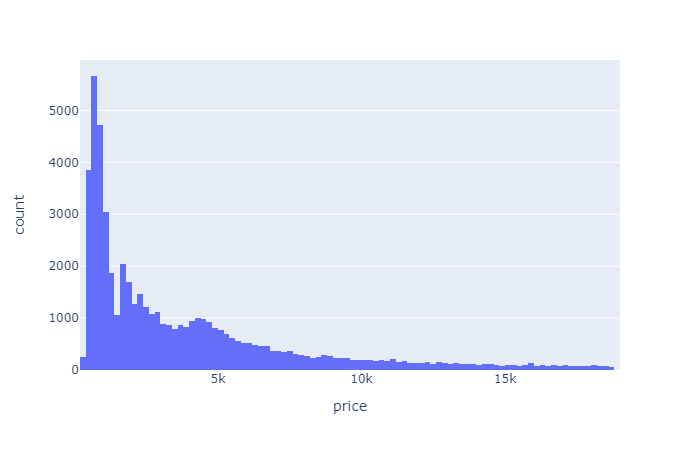

In [22]:
fig = px.histogram(df2, x="price")
fig.show('png')

# We can see, that the distribution of the price is severely "skewed to the right". That means this distribution is not symmetric. So there are a lot of outliers present in the values. Which we will see below.

## Box Plot

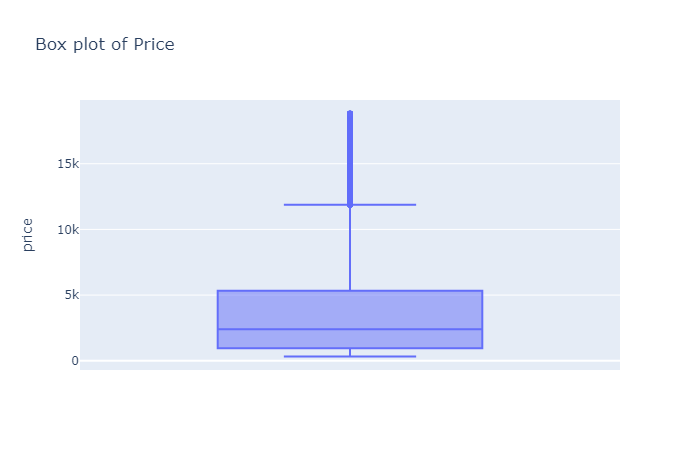

In [23]:
fig = px.box(df2, y="price", title= "Box plot of Price")
fig.show('png')

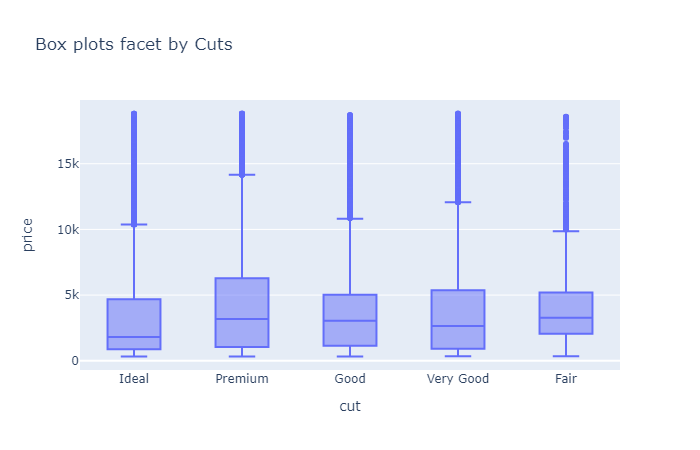

In [24]:
fig = px.box(df2, x="cut", y="price", title = "Box plots facet by Cuts")
fig.show('png')

# As I said before there will be a lot of outliers present in our target field. I tried to facet the target column by other categorical values and still we can see the outliers present in each of the boxplots

# Barchart


In [25]:
df3 = df2[['cut','price']]
df3= df3.groupby('cut').sum()
df3= df3.sort_values('price',ascending=False)

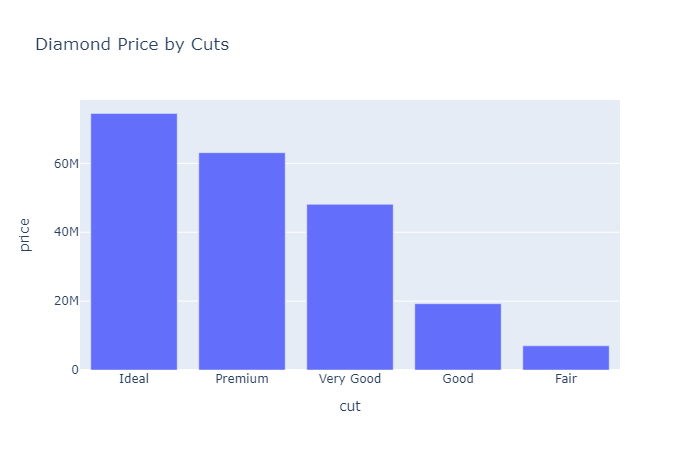

In [26]:

fig=px.bar(df3, y='price', title="Diamond Price by Cuts")
fig.show('png')

# Here we can see the price of diamonds based on their "cuts"(quality of the cuts). It shows that the ideal cut has the most price. So we can conclude that quality of a diamond does influence the price of a diamond.

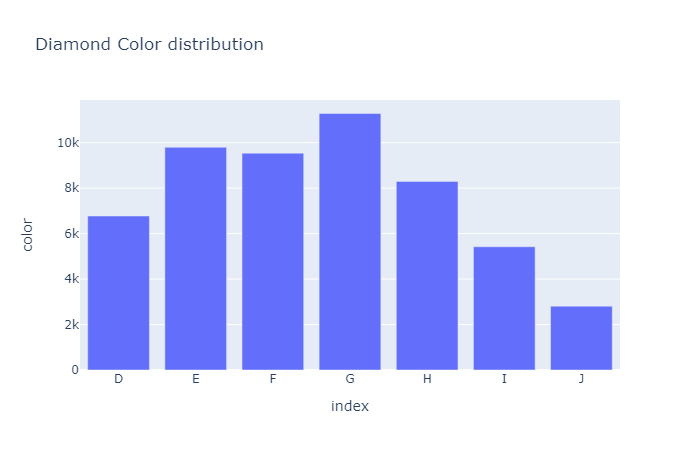

In [27]:
df4 = df2[['color','price']]
df4= df4.groupby('color').agg({'color':'count'})
fig=px.bar(df4,  y='color', title="Diamond Color distribution")
fig.show('png')

# Here I tried to show the color repitition of the diamond in the dataset. Here color means Diamond color, from J (worst) to D (best). However we are seeing that color "G" has the most reptition. 

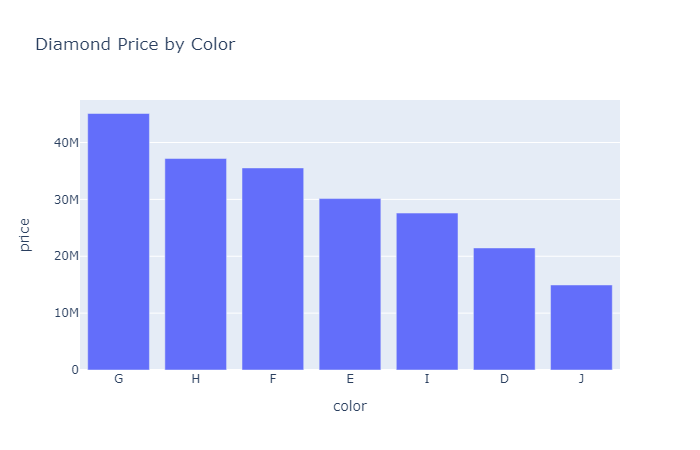

In [28]:
df4 = df2[['color','price']]
df4= df4.groupby('color').agg({'price':'sum'})
df4= df4.sort_values('price',ascending=False)
fig=px.bar(df4,  y='price', title="Diamond Price by Color")
fig.show('png')

# Next, I tried to show the price of the diamond based on colors. And surprisingly color "G" has the most values! Given that "D" is the best color. 

# Correlation Matrix

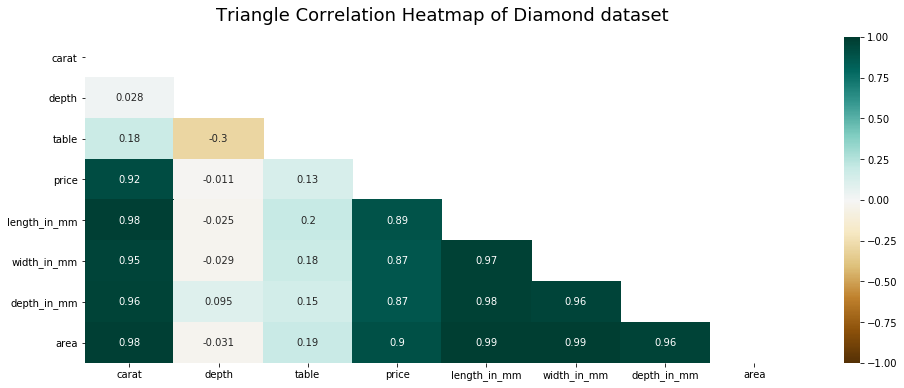

In [29]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))
heatmap = sns.heatmap(df2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap of Diamond dataset', fontdict={'fontsize':18}, pad=16);

## Target value Diamond price has a high correlation with Diamond's Carat and Area. We can see the distribution of this in next scatter plots

## Scatter Plot

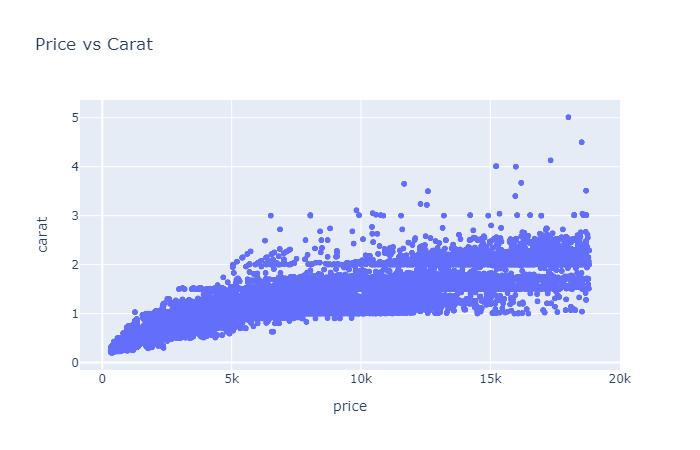

In [30]:
fig= px.scatter(df2, x = 'price', y='carat', title="Price vs Carat" )
fig.show('png')

# Here I wanted to show the relation between target price vs carat of the diamonds. And I found out there is a positive correlation visible from the scatter plot. 

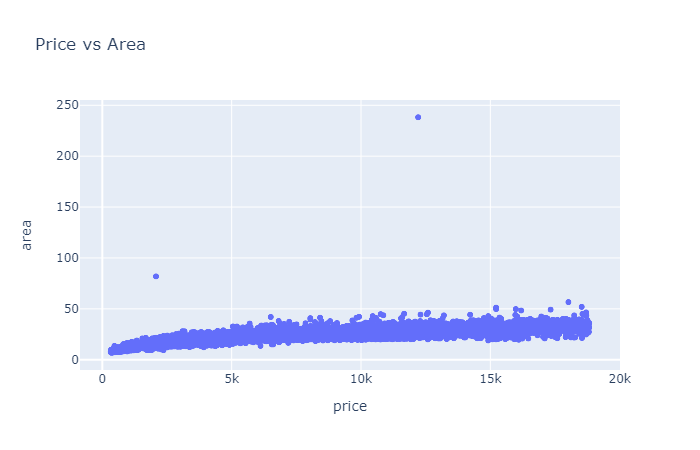

In [31]:
fig=px.scatter(df2, x = 'price', y='area', title="Price vs Area" )
fig.show('png')

# Next, I wanted to see does the price of diamonds rely on the diamonds area. And I found out yes it is. There is a positive correlation between them. Which means the price of the diamonds depend on areas. 

## Bubble Chart

In [32]:
df_size= df2.groupby('color').sum()
df_size=df_size.sort_values('price',ascending=True)
df_size

,carat,depth,table,price,length_in_mm,width_in_mm,depth_in_mm,area
color,,,,,,,,
J,3263.28,173779.3,162337.2,14949281,18306.30,18302.84,11325.37,61677.19940
D,4455.36,417942.7,388857.1,21460753,36700.52,36728.14,22647.65,102451.58860
I,5565.75,335269.8,312126.0,27592749,33731.64,33731.22,20849.82,109165.22410
E,6445.12,604103.5,563241.3,30142944,53017.25,53090.23,32728.73,148141.87495
F,7024.55,588440.7,547796.8,35529815,53571.46,53607.76,33057.74,155309.98770
H,7560.92,513125.7,477283.9,37182858,49654.02,49666.53,30691.29,154486.15770
G,8696.91,696872.1,646430.2,45100755,64068.13,64098.39,39578.70,188494.37630


In [33]:

data = [go.Scatter(
    x=df_size['price'],
    y=df_size['area'],
    mode='markers',
    text=['J<br>size: 20', 'D<br>size: 30', 'I<br>size: 40',
          'E<br>size: 50', 'F<br>size: 60', 'H<br>size: 70', 'G<br>size: 80'],
    marker=dict(size=[20,30, 40,50, 60, 70,80],
                color=df_size['price'],
                #showscale=True
)

    
)]



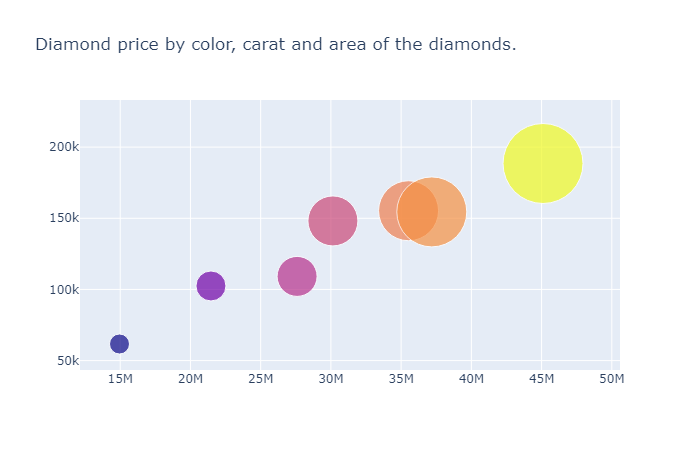

In [34]:
fig = go.Figure(data=data, 
                layout=go.Layout(title=go.layout.Title(text="Diamond price by color, carat and area of the diamonds.")))
fig.show('png')


# Bubble Chart that shows the distribution of price by color, carat and area of the diamonds. 

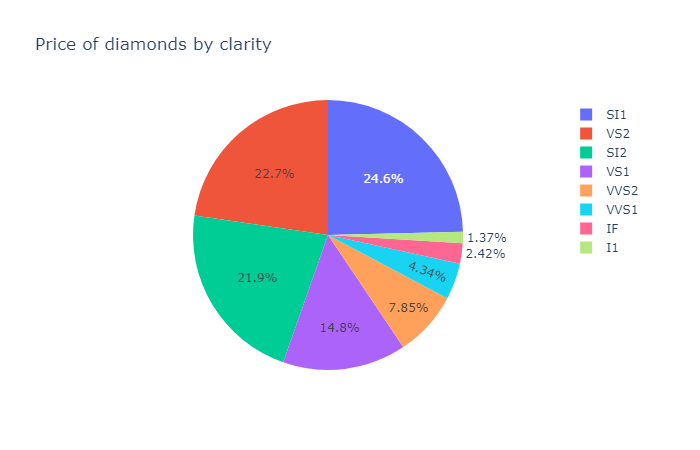

In [35]:

fig = px.pie(df2, values='price', names='clarity', title='Price of diamonds by clarity')
fig.show('png')

# In this piechart I showed the price of diamonds by clarity (A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)). However, though "IF" is the best clarity but it doesn't sells that much. "SI1", "VS2", "SI2" are the top 3 category which sells the most. 

### So we can conclude that price of a diamond does not depend on how clear it looks or how beautiful its color is, but rather it depends on how well the shape/cut of a diamond, how big its size and how many carats in it.   